In [1]:
# Cell 1: Download dataset with correct path
import pandas as pd
import urllib.request
import zipfile
import os

# Use YOUR actual path
project_path = r"C:\Users\ravis\Documents\healthcare_resource_allocation"
data_path = os.path.join(project_path, 'data', 'raw')

# Create data directory
os.makedirs(data_path, exist_ok=True)

# Download
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
zip_path = os.path.join(data_path, "dataset_diabetes.zip")

print("Downloading dataset...")
urllib.request.urlretrieve(url, zip_path)

print("Extracting...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_path)

print("✓ Dataset downloaded successfully!")

Extracting...
✓ Dataset downloaded successfully!


In [2]:
# Cell 2: Import visualization libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded!")

✓ Libraries loaded!


In [3]:
# Cell 3: Load the data
df = pd.read_csv('../data/raw/dataset_diabetes/diabetic_data.csv')

print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n" + "="*70)
print("First 5 rows:")
df.head()

Dataset shape: 101,766 rows × 50 columns

First 5 rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Cell 4: Basic dataset information
print("DATASET OVERVIEW")
print("="*70)
print(f"\nTotal records: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"\nColumn names:")
print(df.columns.tolist())

DATASET OVERVIEW

Total records: 101,766
Total features: 50

Column names:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [5]:
# Cell 5: Data types and missing values
print("DATA TYPES AND MISSING VALUES")
print("="*70)
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

DATA TYPES AND MISSING VALUES
                         Data Type  Non-Null Count  Null Count  Null %
encounter_id                 int64          101766           0    0.00
patient_nbr                  int64          101766           0    0.00
race                        object          101766           0    0.00
gender                      object          101766           0    0.00
age                         object          101766           0    0.00
weight                      object          101766           0    0.00
admission_type_id            int64          101766           0    0.00
discharge_disposition_id     int64          101766           0    0.00
admission_source_id          int64          101766           0    0.00
time_in_hospital             int64          101766           0    0.00
payer_code                  object          101766           0    0.00
medical_specialty           object          101766           0    0.00
num_lab_procedures           int64          101

TARGET VARIABLE: READMITTED

Value counts:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentage distribution:
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64


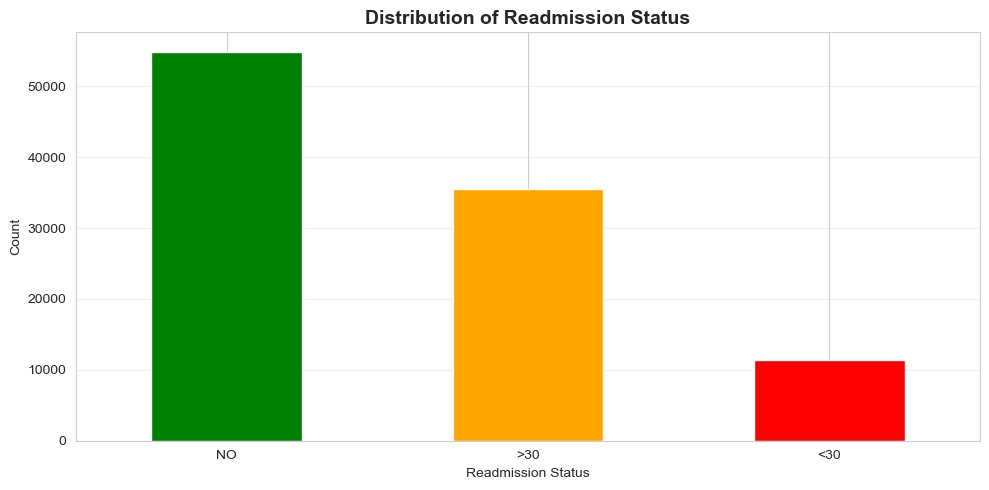

In [6]:
# Cell 6: Target variable - Readmission
print("TARGET VARIABLE: READMITTED")
print("="*70)
print("\nValue counts:")
print(df['readmitted'].value_counts())
print("\nPercentage distribution:")
print(df['readmitted'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(10, 5))
df['readmitted'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Readmission Status', fontsize=14, fontweight='bold')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

DEMOGRAPHIC ANALYSIS


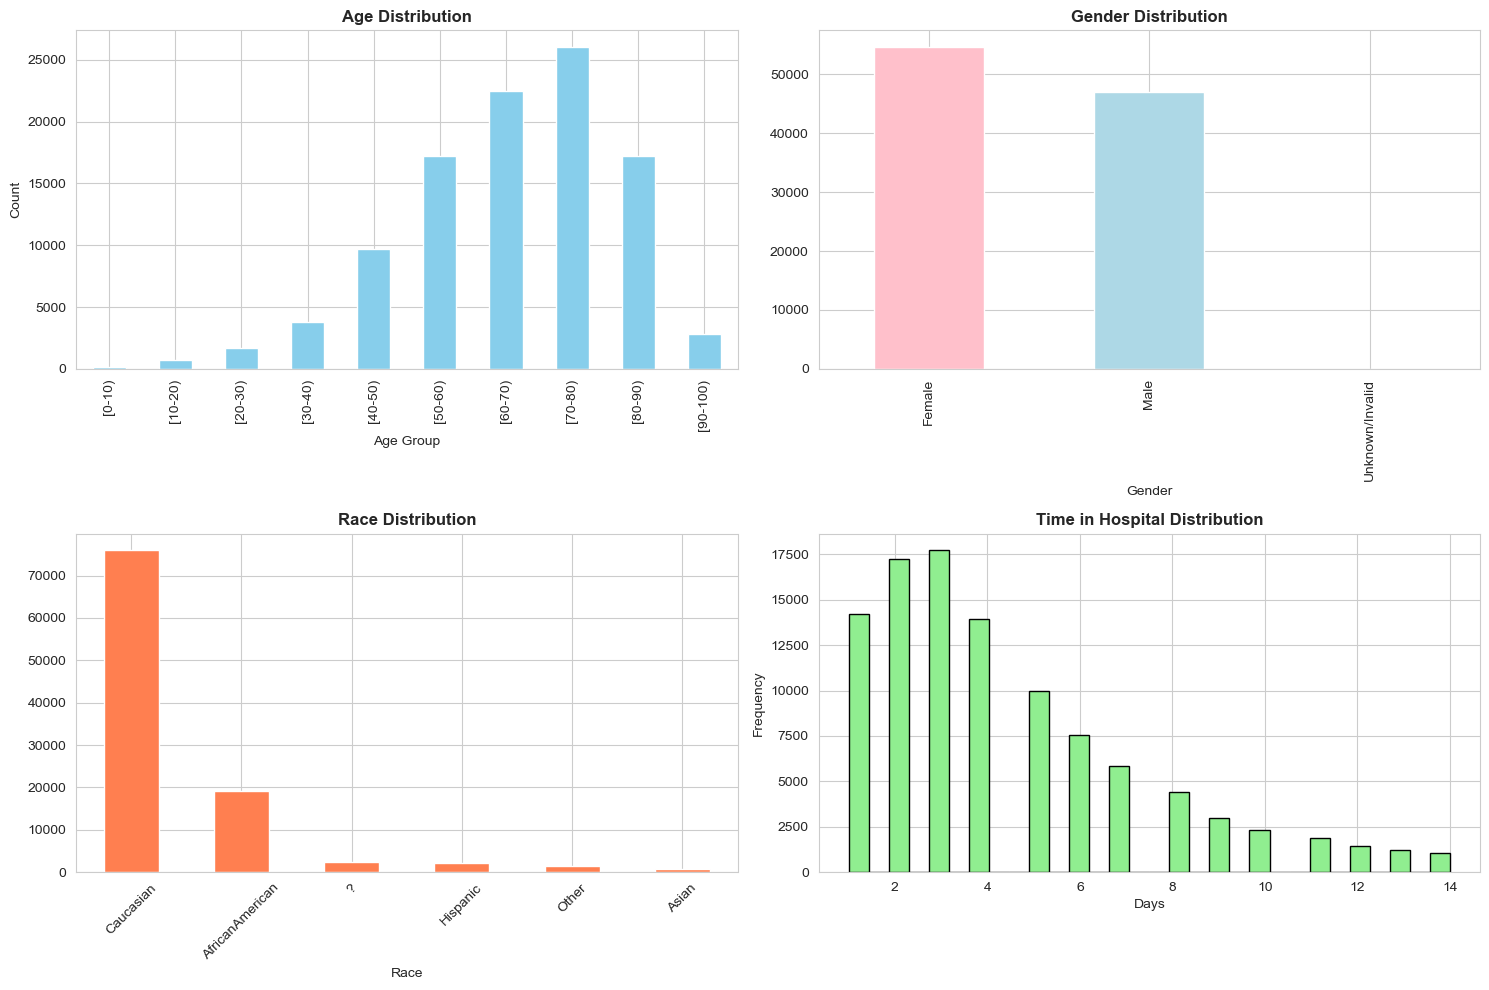


Age groups: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Average time in hospital: 4.40 days


In [7]:
# Cell 7: Demographic features
print("DEMOGRAPHIC ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
df['age'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Age Distribution', fontweight='bold')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Count')

# Gender distribution  
df['gender'].value_counts().plot(kind='bar', ax=axes[0,1], color=['pink', 'lightblue'])
axes[0,1].set_title('Gender Distribution', fontweight='bold')
axes[0,1].set_xlabel('Gender')

# Race distribution
df['race'].value_counts().plot(kind='bar', ax=axes[1,0], color='coral')
axes[1,0].set_title('Race Distribution', fontweight='bold')
axes[1,0].set_xlabel('Race')
axes[1,0].tick_params(axis='x', rotation=45)

# Time in hospital
df['time_in_hospital'].plot(kind='hist', bins=30, ax=axes[1,1], color='lightgreen', edgecolor='black')
axes[1,1].set_title('Time in Hospital Distribution', fontweight='bold')
axes[1,1].set_xlabel('Days')

plt.tight_layout()
plt.show()

print(f"\nAge groups: {df['age'].unique()}")
print(f"\nAverage time in hospital: {df['time_in_hospital'].mean():.2f} days")

MEDICAL FEATURES ANALYSIS


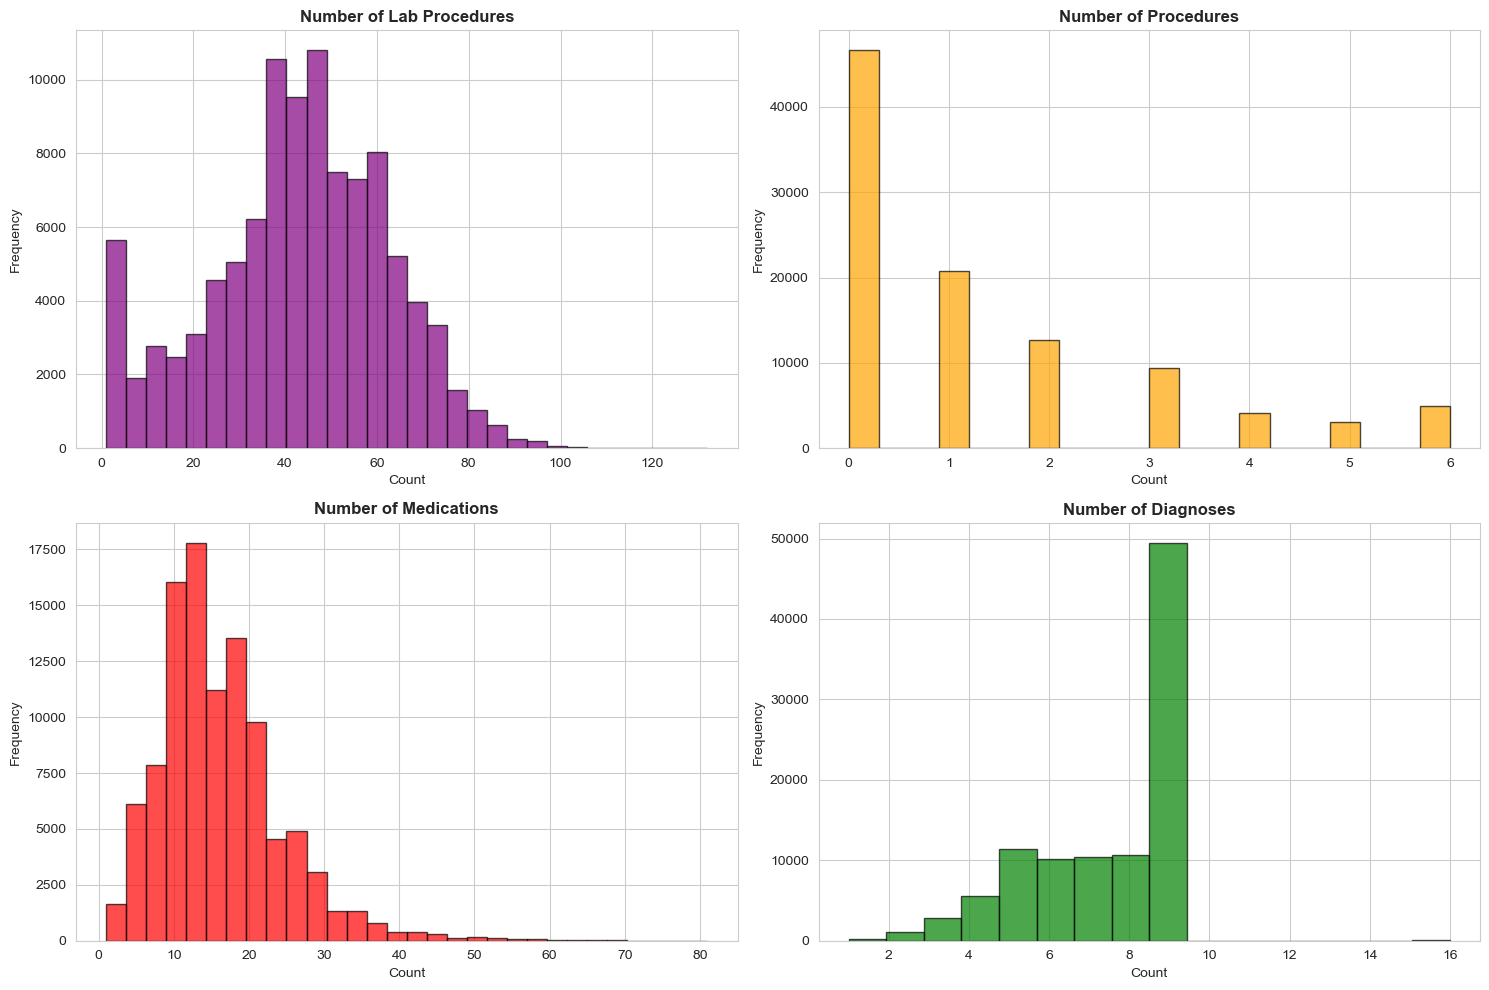


Average lab procedures: 43.10
Average medications: 16.02
Average diagnoses: 7.42


In [8]:
# Cell 8: Medical features
print("MEDICAL FEATURES ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Number of lab procedures
df['num_lab_procedures'].plot(kind='hist', bins=30, ax=axes[0,0], color='purple', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Number of Lab Procedures', fontweight='bold')
axes[0,0].set_xlabel('Count')

# Number of procedures
df['num_procedures'].plot(kind='hist', bins=20, ax=axes[0,1], color='orange', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Number of Procedures', fontweight='bold')
axes[0,1].set_xlabel('Count')

# Number of medications
df['num_medications'].plot(kind='hist', bins=30, ax=axes[1,0], color='red', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Number of Medications', fontweight='bold')
axes[1,0].set_xlabel('Count')

# Number of diagnoses
df['number_diagnoses'].plot(kind='hist', bins=16, ax=axes[1,1], color='green', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Number of Diagnoses', fontweight='bold')
axes[1,1].set_xlabel('Count')

plt.tight_layout()
plt.show()

print(f"\nAverage lab procedures: {df['num_lab_procedures'].mean():.2f}")
print(f"Average medications: {df['num_medications'].mean():.2f}")
print(f"Average diagnoses: {df['number_diagnoses'].mean():.2f}")

READMISSION PATTERNS


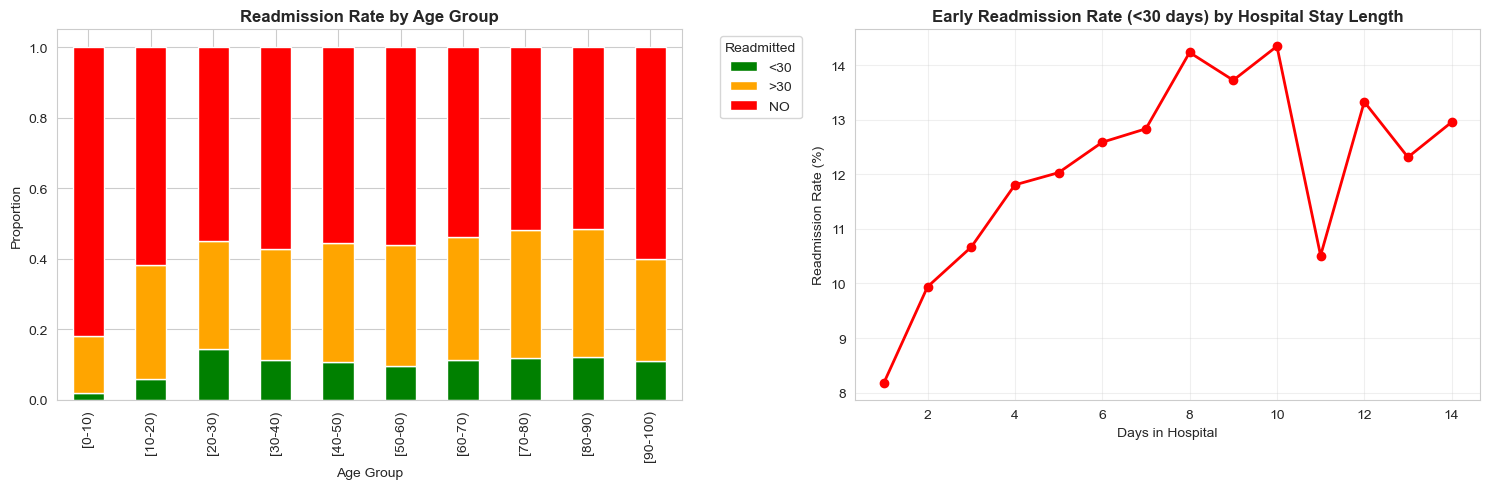

In [9]:
# Cell 9: Readmission by key factors
print("READMISSION PATTERNS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Readmission by age
pd.crosstab(df['age'], df['readmitted'], normalize='index').plot(
    kind='bar', stacked=True, ax=axes[0], 
    color=['green', 'orange', 'red']
)
axes[0].set_title('Readmission Rate by Age Group', fontweight='bold')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Readmitted', bbox_to_anchor=(1.05, 1))

# Readmission by time in hospital
time_readmit = df.groupby('time_in_hospital')['readmitted'].apply(
    lambda x: (x == '<30').sum() / len(x) * 100
)
time_readmit.plot(ax=axes[1], marker='o', color='red', linewidth=2)
axes[1].set_title('Early Readmission Rate (<30 days) by Hospital Stay Length', fontweight='bold')
axes[1].set_xlabel('Days in Hospital')
axes[1].set_ylabel('Readmission Rate (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

CORRELATION WITH EARLY READMISSION

Top 15 factors correlated with early readmission:
early_readmit               1.000000
number_inpatient            0.165147
number_emergency            0.060747
discharge_disposition_id    0.050560
number_diagnoses            0.049524
time_in_hospital            0.044199
num_medications             0.038432
num_lab_procedures          0.020364
number_outpatient           0.018893
patient_nbr                 0.007893
admission_source_id         0.005820
encounter_id               -0.008519
admission_type_id          -0.011651
num_procedures             -0.012227
Name: early_readmit, dtype: float64


Bottom factors (negative correlation):
number_diagnoses       0.049524
time_in_hospital       0.044199
num_medications        0.038432
num_lab_procedures     0.020364
number_outpatient      0.018893
patient_nbr            0.007893
admission_source_id    0.005820
encounter_id          -0.008519
admission_type_id     -0.011651
num_procedures        -0.012227

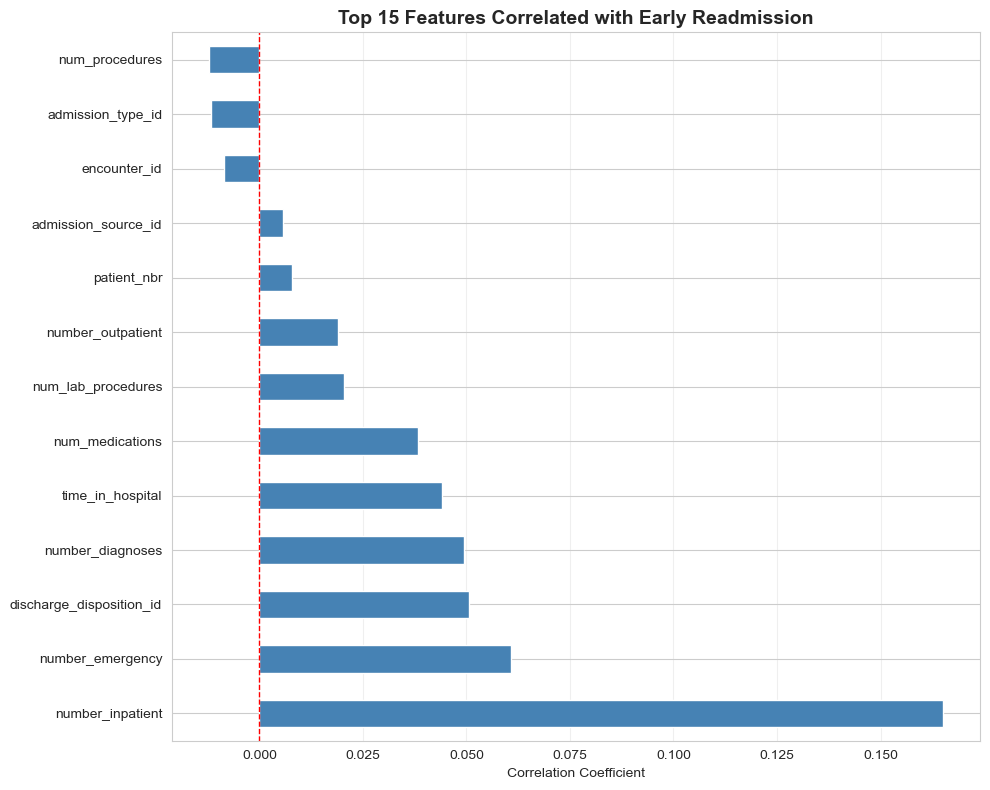

In [10]:
# Cell 10: Correlation analysis - What predicts early readmission?
print("CORRELATION WITH EARLY READMISSION")
print("="*70)

# Create binary target: 1 if readmitted <30 days, 0 otherwise
df['early_readmit'] = (df['readmitted'] == '<30').astype(int)

# Select numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations with early readmission
correlations = df[numeric_cols].corr()['early_readmit'].sort_values(ascending=False)

print("\nTop 15 factors correlated with early readmission:")
print(correlations.head(15))

print("\n" + "="*70)
print("\nBottom factors (negative correlation):")
print(correlations.tail(10))

# Visualize top correlations
plt.figure(figsize=(10, 8))
correlations[1:16].plot(kind='barh', color='steelblue')
plt.title('Top 15 Features Correlated with Early Readmission', fontweight='bold', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Cell 11: Check missing values and data quality issues
print("DATA QUALITY CHECK")
print("="*70)

# Check for '?' as missing value indicator (common in this dataset)
question_marks = (df == '?').sum()
print("\nColumns with '?' as missing values:")
print(question_marks[question_marks > 0].sort_values(ascending=False))

# Check for missing values
print("\nColumns with NULL values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Check unique values in categorical columns
print("\nChecking categorical columns with few unique values:")
for col in df.select_dtypes(include='object').columns:
    unique_count = df[col].nunique()
    if unique_count < 10:
        print(f"\n{col}: {unique_count} unique values")
        print(df[col].value_counts().head())

DATA QUALITY CHECK

Columns with '?' as missing values:
weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64

Columns with NULL values:
max_glu_serum    96420
A1Cresult        84748
dtype: int64

Checking categorical columns with few unique values:

race: 6 unique values
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Name: count, dtype: int64

gender: 3 unique values
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

max_glu_serum: 3 unique values
max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

A1Cresult: 3 unique values
A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

metformin: 4 unique values
metformin
No        81778
Steady    18346
Up    

In [12]:
# Cell 12: Create a clean working copy and handle missing values
print("FEATURE ENGINEERING - STEP 1: Handle Missing Values")
print("="*70)

# Create a copy for modeling
df_model = df.copy()

# Replace '?' with NaN
df_model = df_model.replace('?', np.nan)

# Check columns with high missing percentage
missing_pct = (df_model.isnull().sum() / len(df_model) * 100).sort_values(ascending=False)
print("\nMissing value percentages:")
print(missing_pct[missing_pct > 0].head(10))

# Drop columns with >40% missing (they won't be useful)
high_missing_cols = missing_pct[missing_pct > 40].index.tolist()
print(f"\nDropping columns with >40% missing: {high_missing_cols}")
df_model = df_model.drop(columns=high_missing_cols)

# For medical specialty and payer code (if <40% missing), fill with 'Unknown'
for col in ['medical_specialty', 'payer_code']:
    if col in df_model.columns:
        df_model[col] = df_model[col].fillna('Unknown')

print(f"\nDataset shape after cleaning: {df_model.shape}")

FEATURE ENGINEERING - STEP 1: Handle Missing Values

Missing value percentages:
weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

Dropping columns with >40% missing: ['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty']

Dataset shape after cleaning: (101766, 47)


In [13]:
# Cell 13: Feature engineering - Create new meaningful features
print("FEATURE ENGINEERING - STEP 2: Create New Features")
print("="*70)

# 1. Total interactions (lab + procedures + medications)
df_model['total_interactions'] = (
    df_model['num_lab_procedures'] + 
    df_model['num_procedures'] + 
    df_model['num_medications']
)

# 2. Emergency admission flag
df_model['is_emergency'] = (df_model['admission_type_id'] == 1).astype(int)

# 3. Had outpatient visit before
df_model['had_outpatient_before'] = (df_model['number_outpatient'] > 0).astype(int)

# 4. Had emergency visit before
df_model['had_emergency_before'] = (df_model['number_emergency'] > 0).astype(int)

# 5. Had inpatient visit before
df_model['had_inpatient_before'] = (df_model['number_inpatient'] > 0).astype(int)

# 6. Medication change flag
df_model['medication_changed'] = (df_model['change'] == 'Ch').astype(int)

# 7. On diabetes medication
df_model['on_diabetic_med'] = (df_model['diabetesMed'] == 'Yes').astype(int)

# 8. Long hospital stay (>7 days)
df_model['long_stay'] = (df_model['time_in_hospital'] > 7).astype(int)

# 9. Many diagnoses (>5)
df_model['many_diagnoses'] = (df_model['number_diagnoses'] > 5).astype(int)

print("✓ Created 9 new features!")
print("\nNew features:")
new_features = ['total_interactions', 'is_emergency', 'had_outpatient_before', 
                'had_emergency_before', 'had_inpatient_before', 'medication_changed',
                'on_diabetic_med', 'long_stay', 'many_diagnoses']
for feat in new_features:
    print(f"  - {feat}")

print(f"\nNew dataset shape: {df_model.shape}")

FEATURE ENGINEERING - STEP 2: Create New Features
✓ Created 9 new features!

New features:
  - total_interactions
  - is_emergency
  - had_outpatient_before
  - had_emergency_before
  - had_inpatient_before
  - medication_changed
  - on_diabetic_med
  - long_stay
  - many_diagnoses

New dataset shape: (101766, 56)


In [14]:
# Cell 14: Encode categorical variables
print("FEATURE ENGINEERING - STEP 3: Encode Categorical Variables")
print("="*70)

from sklearn.preprocessing import LabelEncoder

# Select categorical columns to encode
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()

# Remove target variable and ID columns from encoding
cols_to_remove = ['readmitted', 'encounter_id', 'patient_nbr']
categorical_cols = [col for col in categorical_cols if col not in cols_to_remove]

print(f"\nEncoding {len(categorical_cols)} categorical columns...")

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
    
print("✓ Encoding complete!")

# Drop original categorical columns (keep encoded versions)
df_model = df_model.drop(columns=categorical_cols)

print(f"\nFinal dataset shape: {df_model.shape}")
print(f"Features available: {df_model.shape[1]}")

FEATURE ENGINEERING - STEP 3: Encode Categorical Variables

Encoding 32 categorical columns...
✓ Encoding complete!

Final dataset shape: (101766, 56)
Features available: 56


In [15]:
# Cell 15: Prepare final dataset for modeling
print("FEATURE ENGINEERING - STEP 4: Prepare Final Dataset")
print("="*70)

# Drop unnecessary ID columns
id_cols = ['encounter_id', 'patient_nbr']
df_model = df_model.drop(columns=[col for col in id_cols if col in df_model.columns])

# Separate features and target
X = df_model.drop(columns=['readmitted', 'early_readmit'])
y = df_model['early_readmit']

print(f"✓ Dataset prepared for modeling!")
print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance:")
print(y.value_counts(normalize=True) * 100)

# Save processed data
X.to_csv('../data/processed/features.csv', index=False)
y.to_csv('../data/processed/target.csv', index=False)
print("\n✓ Saved processed data to data/processed/")

FEATURE ENGINEERING - STEP 4: Prepare Final Dataset
✓ Dataset prepared for modeling!

Features (X): (101766, 52)
Target (y): (101766,)

Target distribution:
early_readmit
0    90409
1    11357
Name: count, dtype: int64

Class balance:
early_readmit
0    88.840084
1    11.159916
Name: proportion, dtype: float64

✓ Saved processed data to data/processed/
